In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

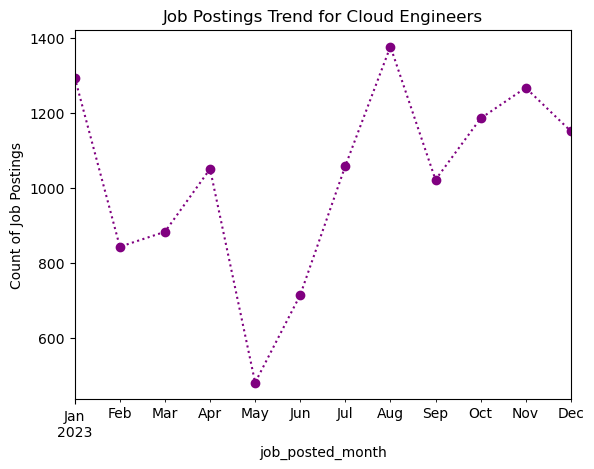

In [24]:
#Job Postings Trend for Cloud Engineers

#Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:
df_ce= df[df['job_title_short']=='Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')

df_plot = df_ce.groupby('job_posted_month').size()
df_plot.plot(
    kind='line', 
    linestyle = ':', 
    color = 'purple', 
    marker = 'o'
)
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.show()



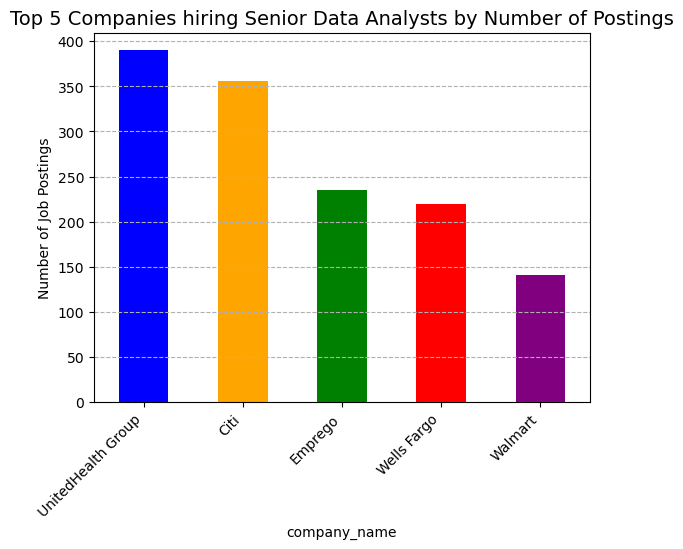

In [ ]:
#Customize Bar Chart
#Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

colors = ['blue', 'orange', 'green', 'red', 'purple']
#Create a DataFrame called SDA_df. 
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
plot_df = SDA_df.groupby('company_name').size().sort_values(ascending = False).head()
#location_counts = SDA_df['company_name'].value_counts().head(5)

plot_df.plot(kind = 'bar', color = list(colors))
# plt.bar(location_counts.index, location_counts.values, color=colors)
plt.grid(axis = 'y', linestyle = '--')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize= 14 )
plt.show()

#Customize the plot by setting the bar colors to 5 different colors with the variable colors.